### Tarefa 03: Medidas Descritivas e Análises de Portfólios - Aplicações em AEDI

Aluno: Eduardo de Oliveira Castro

Matrícula: 210008164

- A Tarefa dar-se-á em elaboração de um portfólio com ao menos 3 ativos, necessita-se também da busca por um indicador de mercado (como o IBOVESPA para o caso brasileiro. 
- Devem montar uma base com ao menos esses 4 ativos, fazer as análises das medidas descritivas dos ativos de forma individual e de forma conjunta. 
- Foquem também na análise das Funções de Densidade de Probabilidade via histograma dos ativos de forma individual e de forma conjunta (carteira).
- Atente-se que o risco dos ativos individuais é diferente dos riscos da carteira, por conta das relações mútuas que tem os ativos (medidas de dispersão conjuntas).
- Discutam essa diferença do ponto de vista estatístico. Essa etapa é obrigatória para obtenção total dos pontos da Tarefa.
- Posteriormente tentem construir uma fronteira eficiente de Markowitz  com os ativos que vocês buscaram na bolsa.

### Importação das bibliotecas e base de dados

In [521]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
from scipy.optimize import minimize 

### Construindo uma Base de Dados Financeiros com ações

In [522]:
# B2W, Lojas Americanas, Magazine Luiza, Mercado Livre, Amazon e Índice Bovespa
acoes = ["AMER3.SA", "LAME4.SA", "MGLU3.SA", "MELI34.SA", "AMZO34.SA", "^BVSP"]

# Criação de um dataframe
acoes_df = pd.DataFrame()

# For para popular o Dataframe com os dados de fechamento da bolsa de valores de cada dia, desde 2015, coletados do Yahoo
for acao in acoes:
    acoes_df[acao] = data.DataReader(acao, data_source="yahoo", start="2015-01-01", end="2021-09-09")['Close']

# Criação de um CSV para salvar esses dados
acoes_df.to_csv("carteira.csv")
# Impressão da tabela
acoes_df

,AMER3.SA,LAME4.SA,MGLU3.SA,MELI34.SA,AMZO34.SA,^BVSP
Date,,,,,,
2015-01-02,21.140331,14.002056,0.232812,NaN,5.317961,48512.0
2015-01-05,20.464613,13.620031,0.237187,NaN,5.250318,47517.0
2015-01-06,20.522532,13.960532,0.234062,NaN,5.047643,48001.0
2015-01-07,20.319817,14.118325,0.241875,NaN,5.142420,49463.0
2015-01-08,19.653751,13.952227,0.240000,NaN,5.141019,49943.0
...,...,...,...,...,...,...
2021-09-02,41.320000,5.780000,18.010000,83.000000,114.309998,116677.0
2021-09-03,41.880001,6.020000,18.900000,83.800003,114.650002,116933.0
2021-09-06,44.150002,6.200000,19.480000,82.910004,115.309998,117869.0


### Começa a ler a partir do CSV gerado

In [523]:
# Leitura do csv
acoes_df = pd.read_csv("carteira.csv")

### Imprime descritivo estatístico simples do dataframe gerado, exibindo tendência, dispersão, valores máximos e mínimos, shape, etc.

In [524]:
acoes_df.describe()

,AMER3.SA,LAME4.SA,MGLU3.SA,MELI34.SA,AMZO34.SA,^BVSP
count,1658.000000,1658.000000,1658.000000,555.000000,1658.000000,1650.000000
mean,36.954268,18.482567,6.888102,45.647707,44.099140,80012.438182
std,27.553424,5.190255,8.186338,22.841280,35.598626,24624.863118
min,8.620235,5.250000,0.030585,16.208332,4.804713,37497.000000
25%,15.058866,15.247791,0.245703,20.662499,16.171178,57952.750000
50%,25.888111,17.141308,3.164844,45.415833,34.733250,77910.500000
75%,53.000000,20.320421,11.239375,66.639999,51.096910,100292.250000
max,126.000000,36.517979,27.450001,89.900002,125.160004,130776.000000


### Visualização do histórico de preço de fechamento das ações

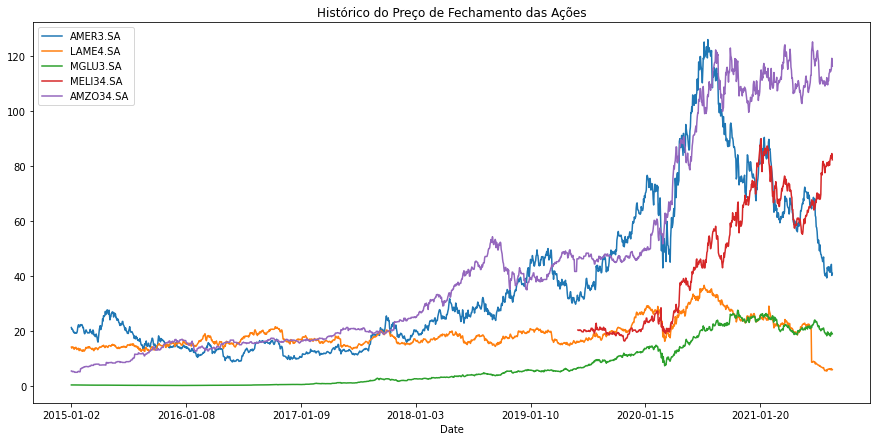

In [525]:
acoes_df.drop(["^BVSP"], axis=1).plot(x="Date", figsize = (15,7), title='Histórico do Preço de Fechamento das Ações');

### Visualização do histórico de preço de fechamento do valor de fechamento do índice BOVESPA

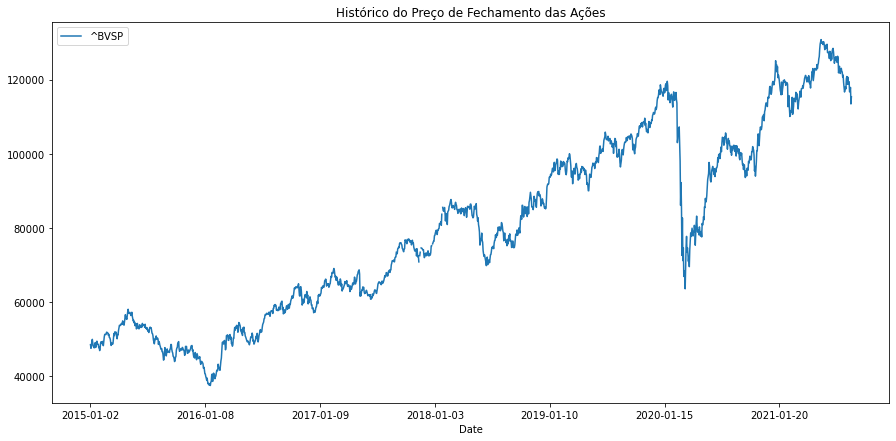

In [526]:
acoes_df.drop(["AMER3.SA", "LAME4.SA", "MGLU3.SA", "MELI34.SA", "AMZO34.SA"], axis=1).plot(x="Date", figsize = (15,7), title='Histórico do Preço de Fechamento das Ações');

### Normalização dos dados

In [527]:
acoes_df_normalizado = acoes_df.copy()

for iterador in acoes_df_normalizado.drop(["Date"], axis=1):
    acoes_df_normalizado[iterador] = acoes_df_normalizado[iterador] / acoes_df_normalizado[iterador][0]

acoes_df_normalizado

,Date,AMER3.SA,LAME4.SA,MGLU3.SA,MELI34.SA,AMZO34.SA,^BVSP
0,2015-01-02,1.000000,1.000000,1.000000,NaN,1.000000,1.000000
1,2015-01-05,0.968037,0.972717,1.018792,NaN,0.987280,0.979490
2,2015-01-06,0.970776,0.997034,1.005369,NaN,0.949169,0.989467
3,2015-01-07,0.961187,1.008304,1.038928,NaN,0.966991,1.019603
4,2015-01-08,0.929680,0.996441,1.030875,NaN,0.966727,1.029498
...,...,...,...,...,...,...,...
1653,2021-09-02,1.954558,0.412797,77.358556,NaN,21.495079,2.405116
1654,2021-09-03,1.981048,0.429937,81.181380,NaN,21.559014,2.410393
1655,2021-09-06,2.088425,0.442792,83.672660,NaN,21.683121,2.429688
1656,2021-09-08,1.897321,0.404941,80.708901,NaN,22.410844,2.337834


### Visualização do histórico de preço de fechamento do valor de fechamento do índice BOVESPA normalizado

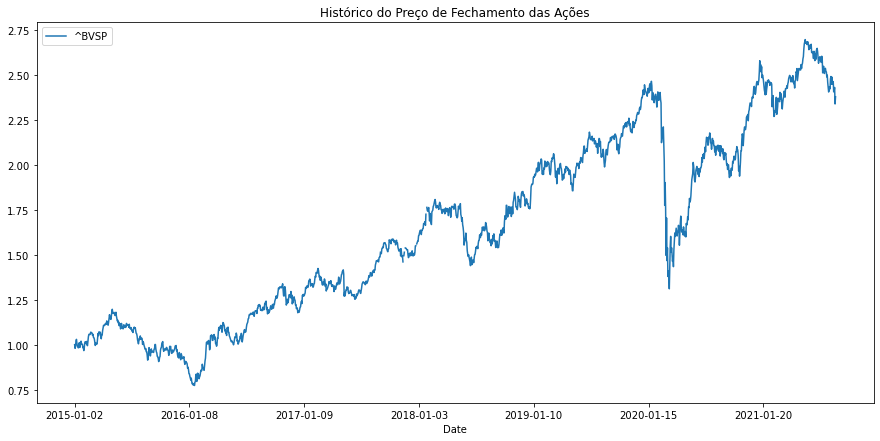

In [528]:
acoes_df_normalizado.drop(["AMER3.SA", "LAME4.SA", "MGLU3.SA", "MELI34.SA", "AMZO34.SA"], axis=1).plot(x="Date", figsize = (15,7), title='Histórico do Preço de Fechamento das Ações');

### Visualização do histórico de preço de fechamento do valor de fechamento das ações normalizado

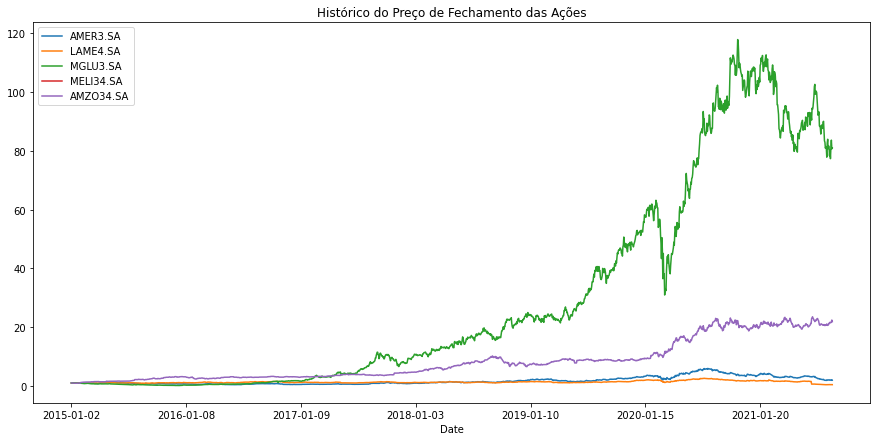

In [529]:
acoes_df_normalizado.drop(["^BVSP"], axis=1).plot(x="Date", figsize = (15,7), title='Histórico do Preço de Fechamento das Ações');

### Histórico do Índice BOVESPA

In [530]:
figura = px.line(title = "Histórico do Índice BOVESPA")

for iterador in acoes_df_normalizado.drop(["Date", "AMER3.SA", "LAME4.SA", "MGLU3.SA", "MELI34.SA", "AMZO34.SA"], axis=1):
    figura.add_scatter(x = acoes_df_normalizado["Date"], y = acoes_df_normalizado[iterador], name = iterador)

figura.show()

### Histórico do preço das ações 

In [531]:
figura = px.line(title = "Histórico do preço das ações")

for iterador in acoes_df_normalizado.drop(["Date", "^BVSP"], axis=1):
    figura.add_scatter(x = acoes_df_normalizado["Date"], y = acoes_df_normalizado[iterador], name = iterador)

figura.show()

### Taxa de Retorno Simples das Ações

A Taxa de retorno representa quanto haveria de ganho ou perda caso uma determinada ação tenha sido comprada em seu primeiro fechamento na bolsa e vendida no último dia do fechamento analisado. A sua fórmula é dada pela seguinte expressão: 

$$
\mathbb{E}[R] = \mathbb{E}\left[\frac{P_t - P_0}{P_0}\right]
$$

#### Da B2W (AMER3.SA):

In [532]:

taxa_de_retorno_simples = ((dataset["AMER3.SA"][len(dataset)-1] - dataset["AMER3.SA"][0])/dataset["AMER3.SA"][0])*100

maior_taxa_de_retorno_simples_num = taxa_de_retorno_simples
menor_taxa_de_retorno_simples_num = taxa_de_retorno_simples
maior_taxa_de_retorno_simples_nome = "AMER3.SA"
menor_taxa_de_retorno_simples_nome = "AMER3.SA"

taxa_de_retorno_simples

93.23253716158848

#### Das Lojas Americanas (LAME4.SA):

In [533]:
taxa_de_retorno_simples = (((dataset["LAME4.SA"][len(dataset)-1] - dataset["LAME4.SA"][0])/dataset["LAME4.SA"][0])*100)

if taxa_de_retorno_simples > maior_taxa_de_retorno_simples_num:
    maior_taxa_de_retorno_simples_num = taxa_de_retorno_simples
    maior_taxa_de_retorno_simples_nome = "LAME4.SA"

elif taxa_de_retorno_simples < menor_taxa_de_retorno_simples_num:
    menor_taxa_de_retorno_simples_num = taxa_de_retorno_simples
    menor_taxa_de_retorno_simples_nome = "LAME4.SA"
    
taxa_de_retorno_simples

-58.57751075790991

#### Da Magazine Luiza (MGLU3.SA):

In [534]:
taxa_de_retorno_simples = ((dataset["MGLU3.SA"][len(dataset)-1] - dataset["MGLU3.SA"][0])/dataset["MGLU3.SA"][0])*100

if taxa_de_retorno_simples > maior_taxa_de_retorno_simples_num:
    maior_taxa_de_retorno_simples_num = taxa_de_retorno_simples
    maior_taxa_de_retorno_simples_nome = "MGLU3.SA"

elif taxa_de_retorno_simples < menor_taxa_de_retorno_simples_num:
    menor_taxa_de_retorno_simples_num = taxa_de_retorno_simples
    menor_taxa_de_retorno_simples_nome = "MGLU3.SA"
    
taxa_de_retorno_simples

7996.661767927789

#### Do Mercado Livre (MELI34.SA):

In [535]:
taxa_de_retorno_simples = ((dataset["MELI34.SA"][len(dataset)-1] - 46.30)/46.30)*100

if taxa_de_retorno_simples > maior_taxa_de_retorno_simples_num:
    maior_taxa_de_retorno_simples_num = taxa_de_retorno_simples
    maior_taxa_de_retorno_simples_nome = "MELI34.SA"

elif taxa_de_retorno_simples < menor_taxa_de_retorno_simples_num:
    menor_taxa_de_retorno_simples_num = taxa_de_retorno_simples
    menor_taxa_de_retorno_simples_nome = "MELI34.SA"
    
taxa_de_retorno_simples

77.55939327099927

#### Da Amazon:

In [536]:
taxa_de_retorno_simples = ((dataset["AMZO34.SA"][len(dataset)-1] - dataset["AMZO34.SA"][0])/dataset["AMZO34.SA"][0])*100

if taxa_de_retorno_simples > maior_taxa_de_retorno_simples_num:
    maior_taxa_de_retorno_simples_num = taxa_de_retorno_simples
    maior_taxa_de_retorno_simples_nome = "AMZO34.SA"

elif taxa_de_retorno_simples < menor_taxa_de_retorno_simples_num:
    menor_taxa_de_retorno_simples_num = taxa_de_retorno_simples
    menor_taxa_de_retorno_simples_nome = "AMZO34.SA"
    
taxa_de_retorno_simples

2087.6804213700284

#### Da Bovespa:

In [537]:
taxa_de_retorno_simples = ((dataset["^BVSP"][len(dataset)-1] - dataset["^BVSP"][0])/dataset["^BVSP"][0])*100
   
taxa_de_retorno_simples

137.7988951187335

### Maior taxa de retorno no ciclo pesquisado:

In [538]:
print(str(maior_taxa_de_retorno_simples_nome) + ": " + str(maior_taxa_de_retorno_simples_num))

MGLU3.SA: 7996.661767927789


### Menor taxa de retorno no ciclo pesquisado:

In [539]:
print(str(menor_taxa_de_retorno_simples_nome) + ": " + str(menor_taxa_de_retorno_simples_num))

LAME4.SA: -58.57751075790991


### Preço Médio

O preço médio das ações representa o valor do somatório do preço de todas as ações dividido pela quantidade de elementos somados, conforme expressão a seguir:

$$
\mathbb{E}[P] = \sum^{t}_{i=1}\frac{P_{i}}{t}
$$

#### Preço médio das ações da B2W (AMER3.SA):

In [540]:
valor_medio = dataset["AMER3.SA"].sum()/len(dataset["AMER3.SA"])

maior_valor_medio_num = valor_medio
menor_valor_medio_num = valor_medio
maior_valor_medio_nome = "AMER3.SA"
menor_valor_medio_nome = "AMER3.SA"

valor_medio

36.954268045390904

#### Preço médio das ações da Lojas Americanas (LAME4.SA):

In [541]:
valor_medio = dataset["LAME4.SA"].sum()/len(dataset["LAME4.SA"])

if valor_medio > maior_valor_medio_num:
    maior_valor_medio_num = valor_medio
    maior_valor_medio_nome = "LAME4.SA"

elif valor_medio < menor_valor_medio_num:
    menor_valor_medio_num = valor_medio
    menor_valor_medio_nome = "LAME4.SA"
    
valor_medio

18.482567020722264

#### Preço médio das ações da Magazine Luiza ("MGLU3.SA", .SA):

In [542]:
valor_medio = dataset["MGLU3.SA"].sum()/len(dataset["MGLU3.SA"])

if valor_medio > maior_valor_medio_num:
    maior_valor_medio_num = valor_medio
    maior_valor_medio_nome = "MGLU3.SA"

elif valor_medio < menor_valor_medio_num:
    menor_valor_medio_num = valor_medio
    menor_valor_medio_nome = "MGLU3.SA"
    
valor_medio

6.888102083452343

#### Preço médio das ações do Mercado Livre (MELI34.SA):

In [543]:
valor_medio = dataset["MELI34.SA"].sum()/len(dataset["MELI34.SA"])

if valor_medio > maior_valor_medio_num:
    maior_valor_medio_num = valor_medio
    maior_valor_medio_nome = "MELI34.SA"

elif valor_medio < menor_valor_medio_num:
    menor_valor_medio_num = valor_medio
    menor_valor_medio_nome = "MELI34.SA"
    
valor_medio

15.28014310392741

#### Preço médio das ações da Amazon (AMZO34.SA):

In [544]:
valor_medio = dataset["AMZO34.SA"].sum()/len(dataset["AMZO34.SA"])

if valor_medio > maior_valor_medio_num:
    maior_valor_medio_num = valor_medio
    maior_valor_medio_nome = "AMZO34.SA"

elif valor_medio < menor_valor_medio_num:
    menor_valor_medio_num = valor_medio
    menor_valor_medio_nome = "AMZO34.SA"
    
valor_medio

44.099139678895256

#### Maior valor médio por ação:

In [545]:
print(str(maior_valor_medio_nome) + ": " + str(maior_valor_medio_num))

AMZO34.SA: 44.099139678895256


#### Menor valor médio por ação:

In [546]:
print(str(menor_valor_medio_nome) + ": " + str(menor_valor_medio_num))

MGLU3.SA: 6.888102083452343


#### Observação

Apesar de ter demonstrado o cálculo dos valores médios por meio da formula apresentada, isso não foi necessário e bastaria utilizar a função describe, para obter o valor "mean", conforme célular a seguir:

In [547]:
dataset.describe()

,AMER3.SA,LAME4.SA,MGLU3.SA,MELI34.SA,AMZO34.SA,^BVSP
count,1658.000000,1658.000000,1658.000000,555.000000,1658.000000,1650.000000
mean,36.954268,18.482567,6.888102,45.647707,44.099140,80012.438182
std,27.553424,5.190255,8.186338,22.841280,35.598626,24624.863118
min,8.620235,5.250000,0.030585,16.208332,4.804713,37497.000000
25%,15.058866,15.247791,0.245703,20.662499,16.171178,57952.750000
50%,25.888111,17.141308,3.164844,45.415833,34.733250,77910.500000
75%,53.000000,20.320421,11.239375,66.639999,51.096910,100292.250000
max,126.000000,36.517979,27.450001,89.900002,125.160004,130776.000000


### Variância

A variância é uma medida de dispersão que mostra o quão distante cada valor desse conjunto está do valor central (médio), conforme fórmula a seguir:

$$ 
\mathbb{V}[P] = \sum^{t}_{i=1}\frac{(P_{i} - \overline{P})^{2}}{t-1}
$$

#### Variância da B2W (AMER3.SA): 

In [548]:
media = dataset["AMER3.SA"].sum()/len(dataset["AMER3.SA"])
variancia = ((dataset["AMER3.SA"] - media) ** 2).sum() / (len(dataset["AMER3.SA"]) -1)
variancia

759.1911537681027

#### Alternativamente, a variância também pode ser calculada utilizando a função var(), conforme célcular a seguir:

In [549]:
dataset["AMER3.SA"].var()

759.1911537681033

In [550]:
# Cálculo da maior e menor variância:

variancia = dataset["AMER3.SA"].var()

maior_variancia_num = variancia
menor_variancia_num = variancia
maior_variancia_nome = "AMER3.SA"
menor_variancia_nome = "AMER3.SA"

variancia = dataset["LAME4.SA"].var()

if variancia > maior_variancia_num:
    maior_variancia_num = variancia
    maior_variancia_nome = "LAME4.SA"

elif variancia < menor_variancia_num:
    menor_variancia_num = variancia
    menor_variancia_nome = "LAME4.SA"
    
variancia = dataset["MGLU3.SA"].var()

if variancia > maior_variancia_num:
    maior_variancia_num = variancia
    maior_variancia_nome = "MGLU3.SA"

elif variancia < menor_variancia_num:
    menor_variancia_num = variancia
    menor_variancia_nome = "MGLU3.SA"

variancia = dataset["MELI34.SA"].var()

if variancia > maior_variancia_num:
    maior_variancia_num = variancia
    maior_variancia_nome = "MELI34.SA"

elif variancia < menor_variancia_num:
    menor_variancia_num = variancia
    menor_variancia_nome = "MELI34.SA"

variancia = dataset["AMZO34.SA"].var()

if variancia > maior_variancia_num:
    maior_variancia_num = variancia
    maior_variancia_nome = "AMZO34.SA"

elif variancia < menor_variancia_num:
    menor_variancia_num = variancia
    menor_variancia_nome = "AMZO34.SA"

#### Ação com maior variância:

In [551]:
print(str(maior_variancia_nome) + ": " + str(maior_variancia_num))

AMZO34.SA: 1267.2621382576847


#### Ação com menor variância:

In [552]:
print(str(menor_variancia_nome) + ": " + str(menor_variancia_num))

LAME4.SA: 26.93874881506618


### Desvio Padrão

O desvio padrão é calculado por meio da raiz quadrada da variância, conforme fórmula a seguir:

$$ 
\sigma_P = \sqrt{\sum^{t}_{i=1}\frac{(P_{i} - \overline{P})^{2}}{t-1}}
$$

In [553]:
# Cálculo do maior e menor desvio padrão:

variancia = dataset["AMER3.SA"].var()
desvio_padrao = math.sqrt(variancia)

maior_desvio_padrao_num = desvio_padrao
menor_desvio_padrao_num = desvio_padrao
maior_desvio_padrao_nome = "AMER3.SA"
menor_desvio_padrao_nome = "AMER3.SA"

variancia = dataset["LAME4.SA"].var()
desvio_padrao = math.sqrt(variancia)

if desvio_padrao > maior_desvio_padrao_num:
    maior_desvio_padrao_num = desvio_padrao
    maior_desvio_padrao_nome = "LAME4.SA"

elif desvio_padrao < menor_desvio_padrao_num:
    menor_desvio_padrao_num = desvio_padrao
    menor_desvio_padrao_nome = "LAME4.SA"

# Ou, alternativamente, também podmos calcular o desvio padrão utilizando a função std()
desvio_padrao = dataset["MGLU3.SA"].std()

if desvio_padrao > maior_desvio_padrao_num:
    maior_desvio_padrao_num = desvio_padrao
    maior_desvio_padrao_nome = "MGLU3.SA"

elif variancia < menor_desvio_padrao_num:
    menor_desvio_padrao_num = desvio_padrao
    menor_desvio_padrao_nome = "MGLU3.SA"

desvio_padrao = dataset["MELI34.SA"].std()

if desvio_padrao > maior_desvio_padrao_num:
    maior_desvio_padrao_num = desvio_padrao
    maior_desvio_padrao_nome = "MELI34.SA"

elif desvio_padrao < menor_desvio_padrao_num:
    menor_desvio_padrao_num = desvio_padrao
    menor_desvio_padrao_nome = "MELI34.SA"

desvio_padrao = dataset["AMZO34.SA"].std()

if desvio_padrao > maior_desvio_padrao_num:
    maior_desvio_padrao_num = desvio_padrao
    maior_desvio_padrao_nome = "AMZO34.SA"

elif desvio_padrao < menor_desvio_padrao_num:
    menor_desvio_padrao_num = desvio_padrao
    menor_desvio_padrao_nome = "AMZO34.SA"

### Ação com o maior desvio padrão:

In [554]:
print(str(maior_desvio_padrao_nome) + ": " + str(maior_desvio_padrao_num))

AMZO34.SA: 35.598625510793035


### Ação com o menor desvio padrão:

In [555]:
print(str(menor_desvio_padrao_nome) + ": " + str(menor_desvio_padrao_num))

LAME4.SA: 5.190255178222568


### Visualização das medidas descritivas para cada um dos ativos

No eixo x temos a representação de cada um dos ativos, no y o valor, na faixa vermelha temos a média e nas faixa verdes temos um desvio acima e um desvio acima. Quanto maior o número de elementos fora dessa faixa, maior o viés. Quanto maior o viés, ou maior a variabilidade permitida, menos a confiabilidade, o que seria ruim.

#### Para a B2W (AMER3.SA):

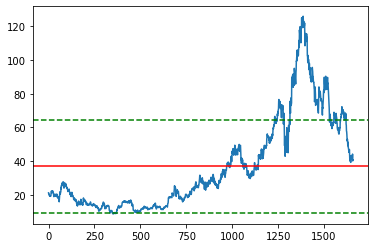

In [556]:
desvio_padrao = dataset["AMER3.SA"].std()

dataset["AMER3.SA"].plot()
plt.axhline(y = dataset["AMER3.SA"].mean(), color = 'r', linestyle = '-')
plt.axhline(y = dataset["AMER3.SA"].mean() + 1*desvio_padrao, color = 'g', linestyle = '--')
plt.axhline(y = dataset["AMER3.SA"].mean() - 1*desvio_padrao, color = 'g', linestyle = '--');

#### Para as Lojas Americanas (LAME4.SA):

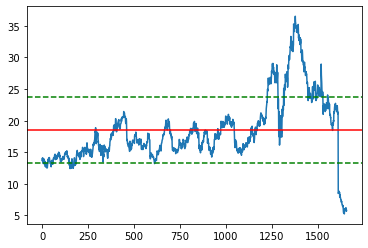

In [557]:
desvio_padrao = dataset["LAME4.SA"].std()

dataset["LAME4.SA"].plot()
plt.axhline(y = dataset["LAME4.SA"].mean(), color = 'r', linestyle = '-')
plt.axhline(y = dataset["LAME4.SA"].mean() + 1*desvio_padrao, color = 'g', linestyle = '--')
plt.axhline(y = dataset["LAME4.SA"].mean() - 1*desvio_padrao, color = 'g', linestyle = '--');

#### Para a Magazine Luiza (MGLU3.SA):

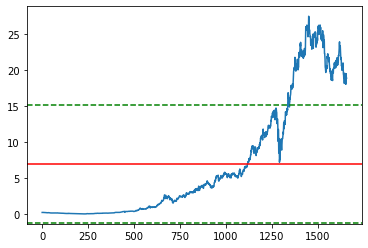

In [558]:
desvio_padrao = dataset["MGLU3.SA"].std()

dataset["MGLU3.SA"].plot()
plt.axhline(y = dataset["MGLU3.SA"].mean(), color = 'r', linestyle = '-')
plt.axhline(y = dataset["MGLU3.SA"].mean() + 1*desvio_padrao, color = 'g', linestyle = '--')
plt.axhline(y = dataset["MGLU3.SA"].mean() - 1*desvio_padrao, color = 'g', linestyle = '--');

#### Para o Mercado Livre (MELI32.SA):

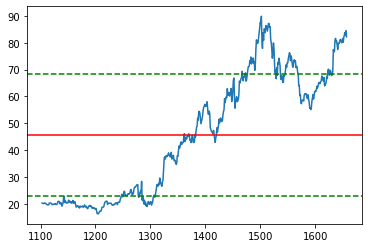

In [559]:
desvio_padrao = dataset["MELI34.SA"].std()

dataset["MELI34.SA"].plot()
plt.axhline(y = dataset["MELI34.SA"].mean(), color = 'r', linestyle = '-')
plt.axhline(y = dataset["MELI34.SA"].mean() + 1*desvio_padrao, color = 'g', linestyle = '--')
plt.axhline(y = dataset["MELI34.SA"].mean() - 1*desvio_padrao, color = 'g', linestyle = '--');

#### Para a Amazon (AMZO34.SA):

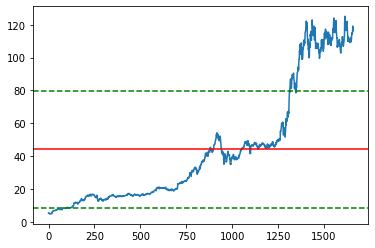

In [560]:
desvio_padrao = dataset["AMZO34.SA"].std()

dataset["AMZO34.SA"].plot()
plt.axhline(y = dataset["AMZO34.SA"].mean(), color = 'r', linestyle = '-')
plt.axhline(y = dataset["AMZO34.SA"].mean() + 1*desvio_padrao, color = 'g', linestyle = '--')
plt.axhline(y = dataset["AMZO34.SA"].mean() - 1*desvio_padrao, color = 'g', linestyle = '--');

#### Breve comentário

Logo, como podemos analisar todas as ações desta carteira apresentam um nível significativo de variabilidade.

### Taxa de Retorno das Ações em conjunto

In [561]:
taxas_retorno = (dataset / dataset.shift(1))-1

taxas_retorno

,AMER3.SA,LAME4.SA,MGLU3.SA,MELI34.SA,AMZO34.SA,^BVSP
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.031963,-0.027283,0.018792,NaN,-0.012720,-0.020510
2,0.002830,0.025000,-0.013175,NaN,-0.038602,0.010186
3,-0.009878,0.011303,0.033380,NaN,0.018776,0.030458
4,-0.032779,-0.011765,-0.007752,NaN,-0.000272,0.009704
...,...,...,...,...,...,...
1653,-0.040409,-0.058632,-0.035867,0.012195,-0.007036,-0.022773
1654,0.013553,0.041522,0.049417,0.009639,0.002974,0.002194
1655,0.054202,0.029900,0.030688,-0.010621,0.005757,0.008005
1656,-0.091506,-0.085484,-0.035421,0.019177,0.033562,-0.037805


#### Retorno Médio:

In [562]:
taxas_retorno.mean()*100


AMER3.SA     0.109486
LAME4.SA     0.002259
MGLU3.SA     0.344931
MELI34.SA    0.312832
AMZO34.SA    0.207182
^BVSP        0.063155
dtype: float64

#### Desvio Padrão diário, que também pode ser entendido como a variação diária do valor

In [563]:
taxas_retorno.std()*100

AMER3.SA     3.757061
LAME4.SA     3.076823
MGLU3.SA     4.041662
MELI34.SA    3.423143
AMZO34.SA    2.055944
^BVSP        1.679302
dtype: float64

#### Desvio Padrão anual, que também pode ser entendido como a variação anual do valor

In [564]:
taxas_retorno.std()*252

AMER3.SA      9.467793
LAME4.SA      7.753594
MGLU3.SA     10.184987
MELI34.SA     8.626319
AMZO34.SA     5.180978
^BVSP         4.231841
dtype: float64

#### Taxa de retorno para a B2W (AMER3.SA):

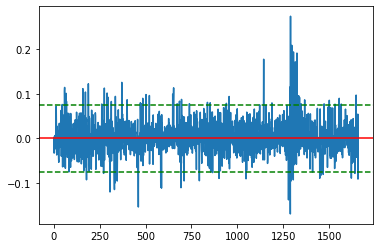

In [565]:
taxas_retorno["AMER3.SA"].plot()
plt.axhline(y = taxas_retorno["AMER3.SA"].mean(), color = 'r', linestyle = '-')
plt.axhline(y = 2*taxas_retorno["AMER3.SA"].std(), color = 'g', linestyle = '--')
plt.axhline(y = - 2*taxas_retorno["AMER3.SA"].std(), color = 'g', linestyle = '--');

#### Taxa de retorno para as Lojas Americanas (LAME4.SA):

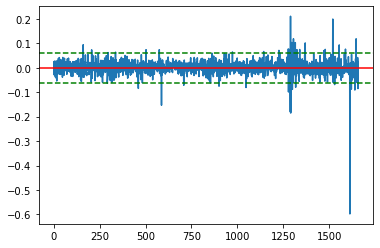

In [566]:
taxas_retorno["LAME4.SA"].plot()
plt.axhline(y = taxas_retorno["LAME4.SA"].mean(), color = 'r', linestyle = '-')
plt.axhline(y = 2*taxas_retorno["LAME4.SA"].std(), color = 'g', linestyle = '--')
plt.axhline(y = - 2*taxas_retorno["LAME4.SA"].std(), color = 'g', linestyle = '--');

#### Taxa de retorno para a Magazine Luiza (MGLU3.SA):

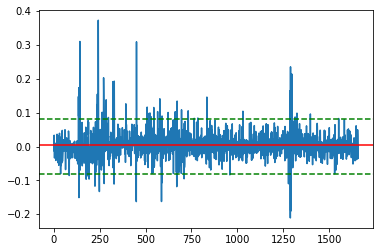

In [567]:
taxas_retorno["MGLU3.SA"].plot()
plt.axhline(y = taxas_retorno["MGLU3.SA"].mean(), color = 'r', linestyle = '-')
plt.axhline(y = 2*taxas_retorno["MGLU3.SA"].std(), color = 'g', linestyle = '--')
plt.axhline(y = - 2*taxas_retorno["MGLU3.SA"].std(), color = 'g', linestyle = '--');

#### Taxa de retorno para o Mercado Livre (MELI34.SA):

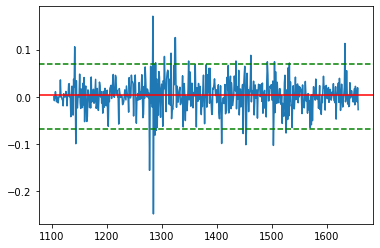

In [568]:
taxas_retorno["MELI34.SA"].plot()
plt.axhline(y = taxas_retorno["MELI34.SA"].mean(), color = 'r', linestyle = '-')
plt.axhline(y = 2*taxas_retorno["MELI34.SA"].std(), color = 'g', linestyle = '--')
plt.axhline(y = - 2*taxas_retorno["MELI34.SA"].std(), color = 'g', linestyle = '--');

#### Taxa de retorno para a Amazon (AMZO34.SA):

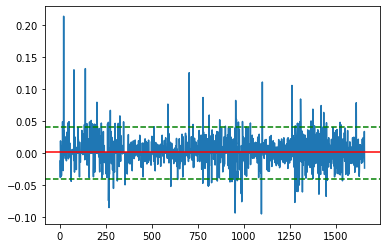

In [569]:
taxas_retorno["AMZO34.SA"].plot()
plt.axhline(y = taxas_retorno["AMZO34.SA"].mean(), color = 'r', linestyle = '-')
plt.axhline(y = 2*taxas_retorno["AMZO34.SA"].std(), color = 'g', linestyle = '--')
plt.axhline(y = - 2*taxas_retorno["AMZO34.SA"].std(), color = 'g', linestyle = '--');

### Histórico de retorno das ações

In [570]:
dataset_date = pd.read_csv('carteira.csv')
date = dataset_date.filter(["Date"]) 
taxas_retorno_date = pd.concat([date, taxas_retorno], axis=1)
taxas_retorno_date = taxas_retorno_date.drop(["^BVSP"], axis=1)

figura = px.line(title = 'Histórico de retorno das ações sem o índice BOVESPA')
for iterador in taxas_retorno_date.columns[1:]:
  figura.add_scatter(x = taxas_retorno_date["Date"] ,y = taxas_retorno_date[iterador], name = iterador)
figura.show()

In [571]:
dataset_date = pd.read_csv('carteira.csv')
date = dataset_date.filter(["Date"]) 
taxas_retorno_date = pd.concat([date, taxas_retorno], axis=1)

figura = px.line(title = 'Histórico de retorno das ações com o índice BOVESPA')
for iterador in taxas_retorno_date.columns[1:]:
  figura.add_scatter(x = taxas_retorno_date["Date"] ,y = taxas_retorno_date[iterador], name = iterador)
figura.show()

In [572]:
dataset_date = pd.read_csv('carteira.csv')
date = dataset_date.filter(["Date"]) 
taxas_retorno_date2 = pd.concat([date, taxas_retorno], axis=1)
taxas_retorno_date2 = taxas_retorno_date2.drop(["AMER3.SA", "LAME4.SA", "MGLU3.SA", "MELI34.SA", "AMZO34.SA"], axis=1)


figura = px.line(title = 'Histórico de retorno do índice BOVESPA')
for iterador in taxas_retorno_date2.columns[1:]:
  figura.add_scatter(x = taxas_retorno_date2["Date"] ,y = taxas_retorno_date2[iterador], name = iterador)
figura.show()

### Correlação entre as ações

#### Covariancia entre as colunas, aqui verificamos como elas variam em relação a si mesmas:

In [573]:
taxas_retorno.cov()

,AMER3.SA,LAME4.SA,MGLU3.SA,MELI34.SA,AMZO34.SA,^BVSP
AMER3.SA,0.001412,0.000618,0.000560,0.000451,0.000031,0.000302
LAME4.SA,0.000618,0.000947,0.000492,0.000209,-0.000037,0.000292
MGLU3.SA,0.000560,0.000492,0.001634,0.000463,-0.000002,0.000318
MELI34.SA,0.000451,0.000209,0.000463,0.001172,0.000310,0.000210
AMZO34.SA,0.000031,-0.000037,-0.000002,0.000310,0.000423,-0.000005
^BVSP,0.000302,0.000292,0.000318,0.000210,-0.000005,0.000282


#### Correlação entre as colunas, aqui verificamos como elas se relacionam entre si:

In [574]:
taxas_retorno.corr()

,AMER3.SA,LAME4.SA,MGLU3.SA,MELI34.SA,AMZO34.SA,^BVSP
AMER3.SA,1.000000,0.534812,0.368849,0.319301,0.040205,0.478198
LAME4.SA,0.534812,1.000000,0.395441,0.143637,-0.058114,0.565082
MGLU3.SA,0.368849,0.395441,1.000000,0.384309,-0.001953,0.468530
MELI34.SA,0.319301,0.143637,0.384309,1.000000,0.436363,0.294549
AMZO34.SA,0.040205,-0.058114,-0.001953,0.436363,1.000000,-0.013005
^BVSP,0.478198,0.565082,0.468530,0.294549,-0.013005,1.000000


#### Gráfico demonstrando a correlação entre as ações:

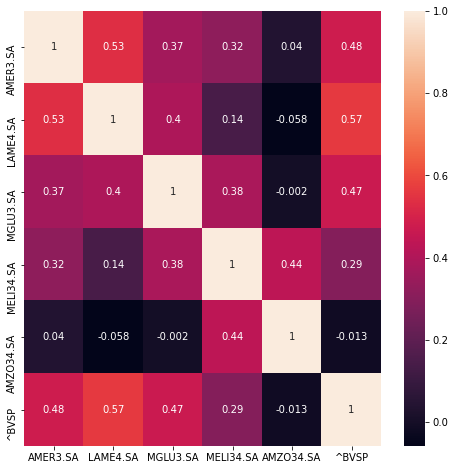

In [575]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

### Correlação entre dois papéis (MGLU3.SA e AMZO34.SA):

In [576]:
base_cor = taxas_retorno.filter(["MGLU3.SA", "AMZO34.SA"])
(base_cor.cov()/(base_cor["MGLU3.SA"].std()*base_cor["AMZO34.SA"].std()))


,MGLU3.SA,AMZO34.SA
MGLU3.SA,1.965842,-0.001953
AMZO34.SA,-0.001953,0.508688


In [577]:
base_cor.cov()


,MGLU3.SA,AMZO34.SA
MGLU3.SA,0.001634,-0.000002
AMZO34.SA,-0.000002,0.000423


In [578]:
pesos = np.array([0.5, 0.5])
np.dot(base_cor.cov()*252, pesos)

array([0.20561684, 0.05305449])

In [579]:
np.dot(pesos, np.dot(base_cor.cov() * 252, pesos))

0.12933566525581228

In [580]:
math.sqrt(np.dot(pesos, np.dot(base_cor.cov() * 252, pesos))) * 100

35.963268101746856

### Para todas as ações:

In [581]:
pesos_c = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])
pesos_c.sum()

1.0

In [582]:
taxas_retorno.cov()*252

,AMER3.SA,LAME4.SA,MGLU3.SA,MELI34.SA,AMZO34.SA,^BVSP
AMER3.SA,0.355711,0.155794,0.141142,0.113689,0.007826,0.076060
LAME4.SA,0.155794,0.238564,0.123921,0.052716,-0.009264,0.073699
MGLU3.SA,0.141142,0.123921,0.411643,0.116793,-0.000409,0.080226
MELI34.SA,0.113689,0.052716,0.116793,0.295291,0.078187,0.052917
AMZO34.SA,0.007826,-0.009264,-0.000409,0.078187,0.106518,-0.001135
^BVSP,0.076060,0.073699,0.080226,0.052917,-0.001135,0.071065


In [583]:
np.dot(taxas_retorno.cov() * 252, pesos_c)

array([0.15483247, 0.11234642, 0.15861806, 0.13133517, 0.03657162,
       0.05635337])

In [584]:
var_port = np.dot(pesos_c, np.dot(taxas_retorno.cov() * 252, pesos_c))
var_port

0.11874074706830258

In [585]:
vol_port = math.sqrt(var_port)
vol_port

0.34458779297633657

In [586]:
media_cart = np.dot(pesos_c, taxas_retorno.mean()*252)
media_cart

0.49225136362721666

In [587]:
pesos_id = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0])
var_port_id = np.dot(pesos_id, np.dot(taxas_retorno.cov() * 252, pesos_id))
var_port_id

0.07106540238016357

In [588]:
vol_port_id = math.sqrt(var_port_id)
vol_port_id

0.2665809490195493

In [589]:
media_id = np.dot(pesos_id, taxas_retorno.mean()*252)
media_id

0.1591503377272567

In [590]:
taxas_retorno_date["CARTEIRA"] = (taxas_retorno_date["AMER3.SA"] + taxas_retorno_date["LAME4.SA"] + 
                                   taxas_retorno_date["MGLU3.SA"] + taxas_retorno_date["MELI34.SA"] + 
                                   taxas_retorno_date["AMZO34.SA"])/5
taxas_retorno_date

,Date,AMER3.SA,LAME4.SA,MGLU3.SA,MELI34.SA,AMZO34.SA,^BVSP,CARTEIRA
0,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,-0.031963,-0.027283,0.018792,NaN,-0.012720,-0.020510,NaN
2,2015-01-06,0.002830,0.025000,-0.013175,NaN,-0.038602,0.010186,NaN
3,2015-01-07,-0.009878,0.011303,0.033380,NaN,0.018776,0.030458,NaN
4,2015-01-08,-0.032779,-0.011765,-0.007752,NaN,-0.000272,0.009704,NaN
...,...,...,...,...,...,...,...,...
1653,2021-09-02,-0.040409,-0.058632,-0.035867,0.012195,-0.007036,-0.022773,-0.025950
1654,2021-09-03,0.013553,0.041522,0.049417,0.009639,0.002974,0.002194,0.023421
1655,2021-09-06,0.054202,0.029900,0.030688,-0.010621,0.005757,0.008005,0.021985
1656,2021-09-08,-0.091506,-0.085484,-0.035421,0.019177,0.033562,-0.037805,-0.031934


### Taxa de Retorno em relação ao Índice Bovespa

In [591]:
taxas_retorno_port = taxas_retorno_date.filter(["Date", "CARTEIRA", "^BVSP"])
taxas_retorno_port

,Date,CARTEIRA,^BVSP
0,2015-01-02,NaN,NaN
1,2015-01-05,NaN,-0.020510
2,2015-01-06,NaN,0.010186
3,2015-01-07,NaN,0.030458
4,2015-01-08,NaN,0.009704
...,...,...,...
1653,2021-09-02,-0.025950,-0.022773
1654,2021-09-03,0.023421,0.002194
1655,2021-09-06,0.021985,0.008005
1656,2021-09-08,-0.031934,-0.037805


### Comparação do retorno da Carteira com o IBOVESPA:

In [592]:
figura = px.line(title = 'Comparação de retorno Carteira x Ibovespa')
for i in taxas_retorno_port.columns[1:]:
  figura.add_scatter(x = taxas_retorno_port["Date"] ,y = taxas_retorno_port[i], name = i)
figura.show()

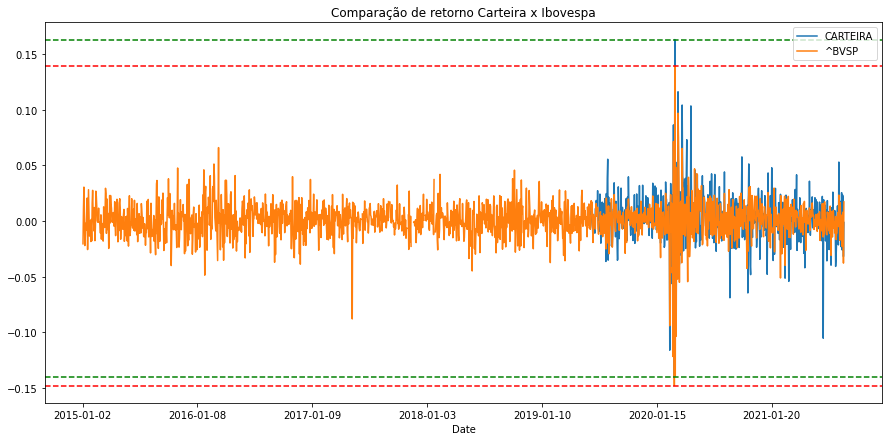

In [593]:
taxas_retorno_port.plot(x = "Date", figsize = (15,7), title = 'Comparação de retorno Carteira x Ibovespa')
plt.axhline(y = taxas_retorno_port["CARTEIRA"].max(), color = 'g', linestyle = '--')
plt.axhline(y = taxas_retorno_port["CARTEIRA"].min(), color = 'g', linestyle = '--')
plt.axhline(y = taxas_retorno_port["^BVSP"].max(), color = 'r', linestyle = '--')
plt.axhline(y = taxas_retorno_port["^BVSP"].min(), color = 'r', linestyle = '--');

### Análise da Função de Densidade de Probabilidade

### Fronteira eficiente de Markowitz:

#### OBSERVAÇÃO

Professor, não compreendi este trecho do Markowitz com precisão e copiei os trechos exibidos em sala de aula e feitos pelo aluno Ilo para fins de aprendizado e teste. Não tenho expectativas de que sejam somados pontos aqui, estou apenas exibindo para demonstrar que ao menos tentei executar o exercício e decidi ser honesto de que os copiei do exemplo exibido em aula apenas para fins de aprendizado.

In [596]:
# B2W, Lojas Americanas, Magazine Luiza, Mercado Livre, Amazon e Índice Bovespa
acoes = ["AMER3.SA", "LAME4.SA", "MGLU3.SA", "MELI34.SA", "AMZO34.SA"]

# Criação de um dataframe
acoes_df = pd.DataFrame()

# For para popular o Dataframe com os dados de fechamento da bolsa de valores de cada dia, desde 2015, coletados do Yahoo
for acao in acoes:
    acoes_df[acao] = data.DataReader(acao, data_source="yahoo", start="2015-01-01", end="2021-09-09")['Close']

# Impressão da tabela
acoes_df

# Normalização 
dataset_fronteira = acoes_df
log_ret = np.log(dataset_fronteira/dataset_fronteira.shift(1))
log_ret.head()

,AMER3.SA,LAME4.SA,MGLU3.SA,MELI34.SA,AMZO34.SA
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.032485,-0.027663,0.018618,NaN,-0.012801
2015-01-06,0.002826,0.024693,-0.013263,NaN,-0.039367
2015-01-07,-0.009927,0.011239,0.032835,NaN,0.018602
2015-01-08,-0.033328,-0.011835,-0.007782,NaN,-0.000272


In [597]:
#O ponto vermelho começa a delinear a fronteira eficiente que traçaremos adiante
#Antes, é preciso definir mais 3 funções.
# 1 - get_ret_vol_sr retornará um array com: retorno, volatilidade e proporção de sharpe de qualquer conjunto de pesos.
# 2 - neg_sharpe retornará a proporção de Sharpe negativa de alguns pesos (que usaremos para minimizar mais tarde).
# 3 - check_sum verificará a soma dos pesos, que deve ser 1. Ela retornará 0 (zero) se a soma for 1

def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

### Criando Portfólio:

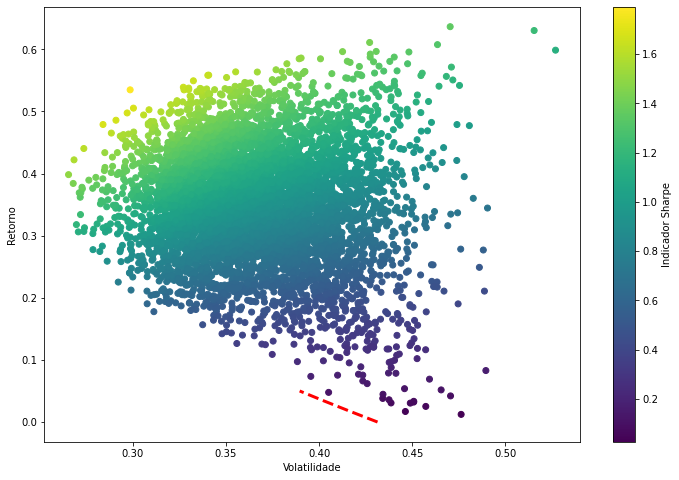

In [598]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(dataset_fronteira.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

max_sr_vol = vol_arr[sharpe_arr.argmax()]
max_sr_ret = ret_arr[sharpe_arr.argmax()]

init_guess = [0.25,0.25,0.25,0.25,0.25,]
cons = (({'type':'eq','fun':check_sum}))
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1))
opt_results = minimize(neg_sharpe, init_guess,method='SLSQP', bounds=bounds, constraints=cons)

def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

frontier_y = np.linspace(0,0.05,200)
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Indicador Sharpe')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()